# House Price Perdiction 🏡 = ❓ 💰

\
###Import basic library





In [34]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


### Read and VISUALISE  data

In [35]:
dataset = pd.read_csv("data.csv")
dataset.head()





,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386


In [36]:
!pip install sweetviz

###this is third party module to visualise large data

In [37]:
import sweetviz as sv

report= sv.analyze(dataset)
report.show_html("\report.html")



                                             |          | [  0%]   00:00 -> (? left)

eport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


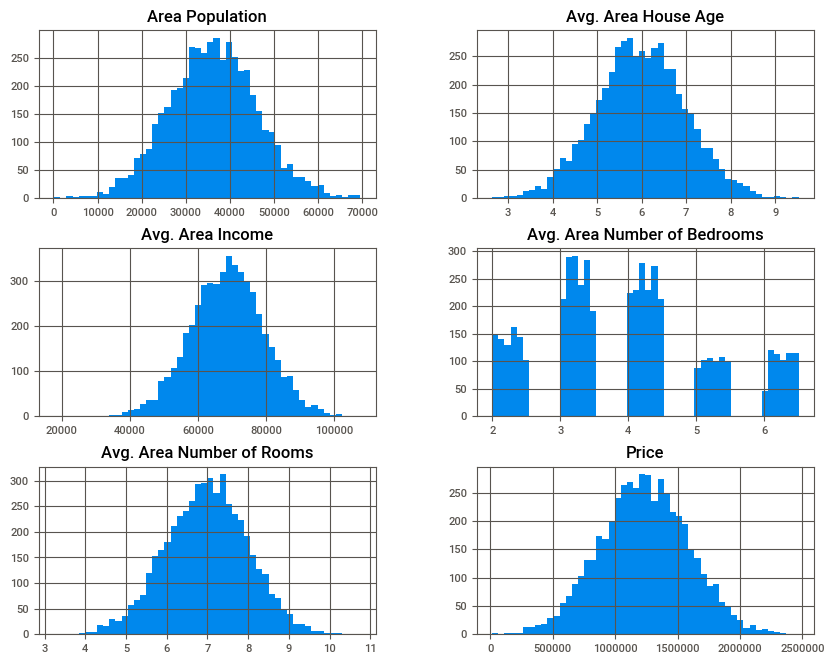

In [38]:
# other ways to visualize 
dataset.hist(bins=50, figsize=(10, 8))
plt.show()

###now we know address data do not affect target

In [39]:
# removing address column
x = dataset.iloc[:,:-2].values
y = dataset.iloc[:,-2].values

### Split data to train and test data ( to find accuracy ) 

In [40]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)


In [41]:
# testdata=pd.read_csv("test.csv")
# xtest= testdata.iloc[:,:-1].values
# ytest= testdata.iloc[:,-1].vaues

### Model selection 
###### Here i selected all as it is good practice to see all model  

#####multiple linear regression

In [42]:
from sklearn.linear_model import LinearRegression
multi = LinearRegression()
multi.fit(xtrain,ytrain)

LinearRegression()

#####decission tree regression

In [43]:
from sklearn.tree import DecisionTreeRegressor
decisn= DecisionTreeRegressor(random_state=0)
decisn.fit(xtrain,ytrain)

DecisionTreeRegressor(random_state=0)

#####polynomial regression tree

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
pol_degree = PolynomialFeatures(degree= 3)
xpoly= pol_degree.fit_transform(xtrain)
poly= LinearRegression()
poly.fit(xpoly,ytrain)

LinearRegression()

#####support vector regression (SVR)
#####{***here we need to do feature scaling*** }


In [45]:
# Feature scaling 
from sklearn.preprocessing import StandardScaler
scx= StandardScaler()
scy= StandardScaler()

xtrain_svr = scx.fit_transform(xtrain)
ytrain_svr = scy.fit_transform(ytrain.reshape(len(ytrain),1))


# training the model
from sklearn.svm import SVR
svr_mod= SVR(kernel = 'rbf')
svr_mod.fit(xtrain_svr,ytrain_svr) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

##### random forest regression

In [46]:
from sklearn.ensemble import RandomForestRegressor
rand_forest= RandomForestRegressor(n_estimators = 10,random_state=0)
rand_forest.fit(xtrain,ytrain)


RandomForestRegressor(n_estimators=10, random_state=0)

### Predicting with accuracy

###### multiple regression

[[ 969608.35  894251.07]
 [ 953868.16  932979.36]
 [ 907506.33  920747.91]
 ...
 [1423701.02 1372994.29]
 [ 744400.93  770770.58]
 [ 488525.83  529282.08]]


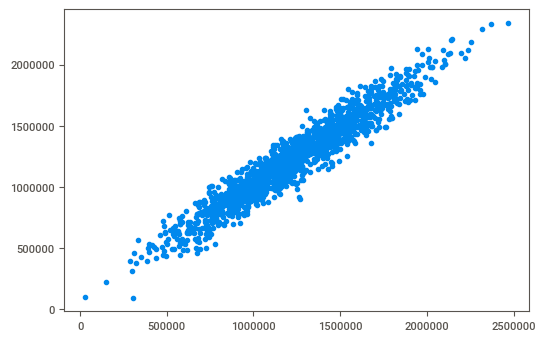

In [47]:
ypred_mul = multi.predict(xtest)
np.set_printoptions(precision=2)
print(np.concatenate((ypred_mul.reshape(len(ypred_mul),1), ytest.reshape(len(ytest),1)),1))
plt.scatter(ytest,ypred_mul)
plt.show()
# accuracy
from sklearn.metrics import r2_score
multi_accu=r2_score(ytest,ypred_mul)

##### decission tree 

[[ 990004.73  894251.07]
 [1019880.65  932979.36]
 [ 879511.2   920747.91]
 ...
 [1717570.53 1372994.29]
 [ 734562.1   770770.58]
 [ 469262.82  529282.08]]


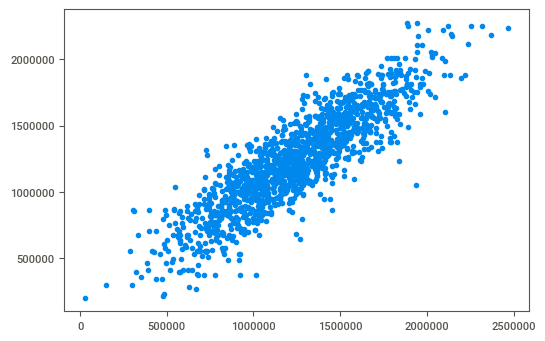

In [48]:
ypred_dis= decisn.predict(xtest)
np.set_printoptions(precision=2)
print(np.concatenate((ypred_dis.reshape(len(ypred_dis),1), ytest.reshape(len(ytest),1)),1))
plt.scatter(ytest,ypred_dis)
plt.show()
#  accuracy
from sklearn.metrics import r2_score
dec_accu=r2_score(ytest,ypred_dis)

#####polynomial decission tree

[[ 961560.83  894251.07]
 [ 942750.02  932979.36]
 [ 912846.25  920747.91]
 ...
 [1429984.25 1372994.29]
 [ 753547.29  770770.58]
 [ 512078.31  529282.08]]


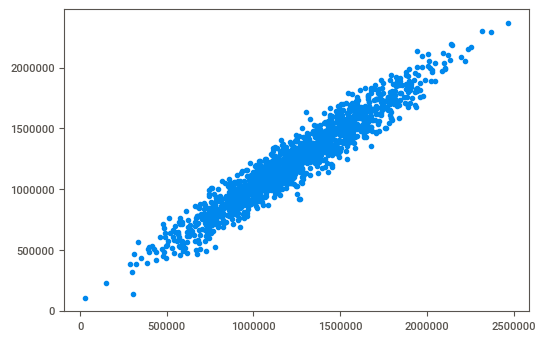

In [49]:
ypred = poly.predict(pol_degree.transform(xtest))
np.set_printoptions(precision=2)
print(np.concatenate((ypred.reshape(len(ypred),1), ytest.reshape(len(ytest),1)),1))
plt.scatter(ytest,ypred)
plt.show()
# accuracy 
from sklearn.metrics import r2_score
pol_accu=r2_score(ytest,ypred)

#####SVR

In [50]:
ypred = scy.inverse_transform(svr_mod.predict(scx.transform(xtest)).reshape(len(ytest),1))
np.set_printoptions(precision=2)
print(np.concatenate((ypred.reshape(len(ypred),1), ytest.reshape(len(ytest),1)),1))

# Accuracy
from sklearn.metrics import r2_score
svr_accu=r2_score(ytest, ypred)

[[ 969852.36  894251.07]
 [ 928159.07  932979.36]
 [ 895933.34  920747.91]
 ...
 [1421336.21 1372994.29]
 [ 757628.87  770770.58]
 [ 550504.24  529282.08]]


#####Random Forest regression

[[ 952941.6   894251.07]
 [1002746.88  932979.36]
 [ 883687.97  920747.91]
 ...
 [1358613.35 1372994.29]
 [ 732782.72  770770.58]
 [ 486092.22  529282.08]]


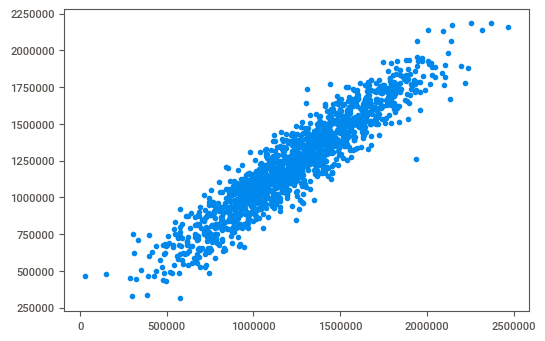

In [51]:
ypred= rand_forest.predict(xtest)
np.set_printoptions(precision=2)
print(np.concatenate((ypred.reshape(len(ypred),1), ytest.reshape(len(ytest),1)),1))
plt.scatter(ytest,ypred)
plt.show()
# accuracy
from sklearn.metrics import r2_score
ran_accu=r2_score(ytest, ypred)

In [52]:

print("Random forest regression predicts with accuracy of :" )
print(ran_accu)
print("SVR  regression predicts with accuracy of :" )
print(svr_accu)

print("polynomial regression predicts with accuracy of :" )
print(pol_accu)
print("Decision tree regression predicts with accuracy of :" )
print(dec_accu)
print("multiple  regression predicts with accuracy of :" )
print(multi_accu)


Random forest regression predicts with accuracy of :
0.8722467920246588
SVR  regression predicts with accuracy of :
0.9055713865885
polynomial regression predicts with accuracy of :
0.9178590557563333
Decision tree regression predicts with accuracy of :
0.7567463902775959
multiple  regression predicts with accuracy of :
0.9200757649412041


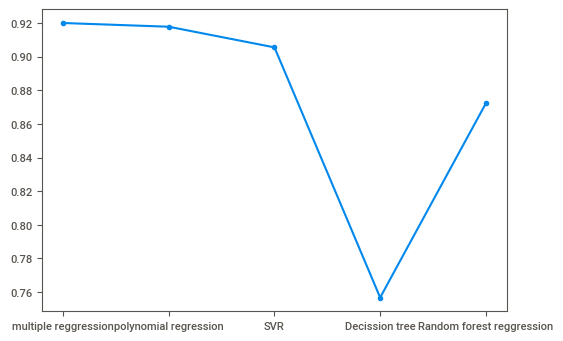

In [53]:
act=[multi_accu,pol_accu,svr_accu,dec_accu,ran_accu]
yaxixp=["multiple reggression","polynomial regression","SVR","Decission tree","Random forest reggression"]
plt.plot(yaxixp,act)
plt.scatter(yaxixp,act)
plt.show()
